### 第一題 - (1) 用pytorch optimizer 方式找出 minimum

In [2]:
import torch

# send x to optimizer (similar to weight that minimize loss function), 
# see polynomial as another type of loss function.

x= torch.tensor([0.0], requires_grad=True) # pick initial x
opt = torch.optim.SGD(params=[x], lr=0.002) # optimizer

# Define the polynomial function
def polynomial(x, a4, a3, a2, a1, a0):
    return a4 * x**4 + a3 * x**3 + a2 * x**2 + a1 * x + a0

def opt_find_min(a4,a3,a2,a1,a0):
    for i in range(10000):
        opt.zero_grad() # reset gradient
        # calculate gradient
        val = polynomial(x, a4,a3,a2,a1,a0)
        val.backward()
        opt.step() # automatically update x
    
    return x


# input a4,a3,a2,a1,a0 first
while True:
    try:  
        print("請先輸入(a4 ,a3 ,a2 ,a1 ,a0)!")
        a4 = int(input("input a4: "))
        if a4 <= 0:
            raise Exception("Sorry, a4 must be larger than 0.")
        a3 = int(input("input a3: "))
        a2 = int(input("input a2: "))
        a1 = int(input("input a1: "))
        a0 = int(input("input a0: "))
        break
    except Exception as e:
        print("Error message: " ,e)
        print("請重新輸入!")
        print()

# ouput x_min
x_min = opt_find_min(a4, a3, a2, a1, a0)
y = polynomial(x_min, a4, a3, a2, a1, a0)
print('when x = {}, we have minimum of y = {}'.format(x_min.data.numpy(), y.data.numpy()))

請先輸入(a4 ,a3 ,a2 ,a1 ,a0)!
input a4: 1
input a3: 1
input a2: 1
input a1: 1
input a0: 1
when x = [-0.60582423], we have minimum of y = [0.6735532]


### 第一題 - (2) 不使用pytorch optimizer 方式找出 minimum

In [3]:
import torch

# Define the polynomial function
def polynomial(x, a4, a3, a2, a1, a0):
    return a4 * x**4 + a3 * x**3 + a2 * x**2 + a1 * x + a0

def find_min(a4,a3,a2,a1,a0):
    # Initialize x as a tensor with requires_grad=True
    learning_rate = 0.002
    x= torch.tensor([0.0], requires_grad=True) # pick initial x

    for times in torch.arange(1, 10000): # 重複幾次
        y = polynomial(x, a4, a3, a2, a1, a0) # calculate value
        y.backward() # gradients
        x.data -= learning_rate * x.grad # 更改 x 值
        x.grad.data.zero_() # reset the accumulate gradients

    return (x,y)

# input a4,a3,a2,a1,a0 first
while True:
    try:  
        print("請先輸入(a4 ,a3 ,a2 ,a1 ,a0)!")
        a4 = int(input("input a4: "))
        if a4 <= 0:
            raise Exception("Sorry, a4 must be larger than 0.")
        a3 = int(input("input a3: "))
        a2 = int(input("input a2: "))
        a1 = int(input("input a1: "))
        a0 = int(input("input a0: "))
        break
    except Exception as e:
        print("Error message: " ,e)
        print("請重新輸入!")
        print()
    
x, y = find_min(a4 ,a3 ,a2 ,a1 ,a0)
print('when x = {}, we have minimum of y = {}'.format(x.data.numpy(), 
                                                      polynomial(x, a4, a3 ,a2 ,a1, a0).data.numpy()))

請先輸入(a4 ,a3 ,a2 ,a1 ,a0)!
input a4: 1
input a3: 1
input a2: 1
input a1: 1
input a0: 1
when x = [-0.60582423], we have minimum of y = [0.6735532]


In [4]:
# Define the polynomial function
def polynomial(x, a4, a3, a2, a1, a0):
    return a4 * x**4 + a3 * x**3 + a2 * x**2 + a1 * x + a0

# Define the derivative of the polynomial
def derivative(x, a4, a3, a2, a1, a0):
    return 4*a4* x**3 + 3*a3* x**2 + 2*a2* x + a1

def find_min_without_pytorch(a4,a3,a2,a1,a0):
    # Initialize x as a tensor with requires_grad=True
    learning_rate = 0.002
    x= 0 # pick initial x

    while True:
        diff_y = derivative(x, a4, a3, a2, a1, a0) # calculate derivative value
        if abs(diff_y) <= 1e-5: # 當小於某個值就跳出
            break
        x -= learning_rate * diff_y # update x
        y = polynomial(x, a4, a3, a2, a1, a0) # calculate y
    return (x,y)

# input a4,a3,a2,a1,a0 first
while True:
    try:  
        print("請先輸入(a4 ,a3 ,a2 ,a1 ,a0)!")
        a4 = int(input("input a4: "))
        if a4 <= 0:
            raise Exception("Sorry, a4 must be larger than 0.")
        a3 = int(input("input a3: "))
        a2 = int(input("input a2: "))
        a1 = int(input("input a1: "))
        a0 = int(input("input a0: "))
        break
    except Exception as e:
        print("Error message: " ,e)
        print("請重新輸入!")
        print()
        
        
x, y = find_min_without_pytorch(a4 ,a3 ,a2 ,a1 ,a0)
print('when x = {}, we have minimum of y = {}'.format(x, y))

請先輸入(a4 ,a3 ,a2 ,a1 ,a0)!
input a4: 1
input a3: 1
input a2: 1
input a1: 1
input a0: 1
when x = -0.6058259932641119, we have minimum of y = 0.673553223494285


### 用Pytorch 建立CNN模型

In [10]:
from PIL import Image
import torch
import torch.nn as nn
import torch.nn.functional as funcs
import torchvision
import torchvision.transforms as transforms

# load dataset
transform = transforms.Compose([
    transforms.Resize((128, 128)), # resizing image
    transforms.ToTensor()
])
train = torchvision.datasets.ImageFolder('./HW1 image/reference', transform=transform)
# print(train_data.classes)  #得到兩個類別cats and dogs
# print(train_data.class_to_idx) # 按順序標記為 0,1,...
train_size = int(0.7 * len(train))
valid_size = len(train) - train_size

# 分成訓練集跟驗證集
train_data, valid_data = torch.utils.data.random_split(train, [train_size, valid_size])

train_loader = torch.utils.data.DataLoader(train_data, batch_size=10, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=5, shuffle=False)

# define CNN model
class MyCNN(nn.Module):
    def __init__(self):
        super(MyCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32 ,3) # get 32 x 126 x 126
        self.pool1 = nn.MaxPool2d(2,2) # get 32 x 63 x 63
        self.conv2 = nn.Conv2d(32, 64 ,4) # get 64 x 60 x 60
        self.pool2 = nn.MaxPool2d(2,2) # get 64 x 30 x 30
        self.conv3 = nn.Conv2d(64, 128 ,3) # get 128 x 28 x 28
        self.pool3 = nn.MaxPool2d(2,2) # get 128 x 14 x 14
        # Flatten layers
        self.fc1 = nn.Linear(25088, 512) 
        self.fc2 = nn.Linear(512, 2) 

        # introducing dropout layer to prevent overfitting
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        x = funcs.relu(self.conv1(x)) # apply RelU
        x = self.pool1(x)
        x = self.dropout(x)
        
        x = funcs.relu(self.conv2(x)) # apply RelU
        x = self.pool2(x)
        x = self.dropout(x)
        
        x = funcs.relu(self.conv3(x)) # apply RelU
        x = self.pool3(x)
        x = self.dropout(x)
        
        x = x.view(-1, 25088) # flatten
        x = funcs.relu(self.fc1(x))
        x = self.dropout(x)
        x = (self.fc2(x))
        return x

# set up a model to trainning
model = MyCNN()
print(model)

print('Before saveing: ')
print(model.state_dict())

MyCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(4, 4), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=25088, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=2, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)
Before saveing: 
OrderedDict([('conv1.weight', tensor([[[[ 7.4135e-02,  9.0461e-02,  1.5640e-02],
          [ 1.8022e-01,  3.8071e-02,  1.0569e-01],
          [-4.3414e-02, -8.5452e-02,  3.0076e-02]],

         [[-1.2083e-01,  1.2933e-01, -1.1520e-02],
          [ 1.0303e-01,  9.6054e-02,  4.9206e-03],
          [-4.8757e-02, -7.6978e-02, -9.3173e-02]],

         [[ 9.7592e-03,  

### 1. 訓練CNN，並用分割出來的訓練資料測試
#### Note: 將圖片統一Resize成 128x128

### 2. Drawing Confusion Matrix
#### PS: 0 indicating 'cat' , 1 indicating 'dog'

### 3. 畫出AUROC

In [ ]:
!pip install seaborn

Epoch [1/10], Train Loss: 0.5334, Valid Loss: 0.7616, Valid Accuracy: 50.00%
Epoch [2/10], Train Loss: 0.4812, Valid Loss: 0.7568, Valid Accuracy: 56.67%
Epoch [3/10], Train Loss: 0.4474, Valid Loss: 0.7775, Valid Accuracy: 56.67%
Epoch [4/10], Train Loss: 0.4517, Valid Loss: 0.7813, Valid Accuracy: 53.33%
Epoch [5/10], Train Loss: 0.4455, Valid Loss: 0.8380, Valid Accuracy: 50.00%
Epoch [6/10], Train Loss: 0.4199, Valid Loss: 0.8240, Valid Accuracy: 53.33%
Epoch [7/10], Train Loss: 0.4371, Valid Loss: 0.7687, Valid Accuracy: 36.67%
Epoch [8/10], Train Loss: 0.4008, Valid Loss: 0.8127, Valid Accuracy: 43.33%
Epoch [9/10], Train Loss: 0.3556, Valid Loss: 0.8364, Valid Accuracy: 50.00%
Epoch [10/10], Train Loss: 0.3900, Valid Loss: 0.8373, Valid Accuracy: 53.33%


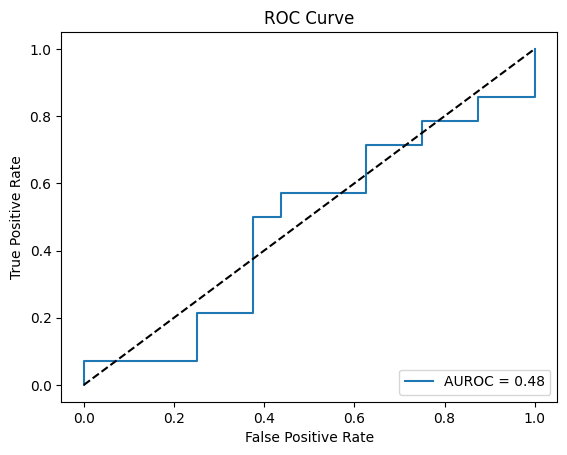

[[10  6]
 [ 8  6]]


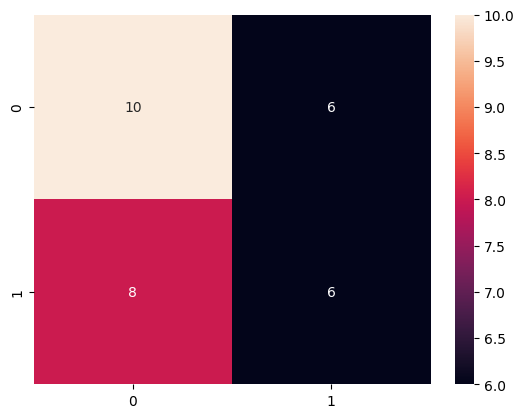

In [17]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

# Device will determine whether to run the training on GPU or CPU.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 假設 model 已經定義並初始化
# model = ...

# 如果使用 GPU，將模型移動到 GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.02)  # optimize all CNN parameters

# 訓練模型
def training(model):
    for epoch in range(10):
        model.train()  # 訓練模式
        train_loss = 0.0    # total loss
        for i, (image, label) in enumerate(train_loader):
            # move tensors to GPU if CUDA is available
            image, label = image.to(device), label.to(device)
            
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            outputs = model(image)
            # calculate the batch loss
            loss = criterion(outputs, label)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update training loss
            train_loss += loss.item() * image.size(0)
          
        model.eval()  # 改變成測試模式
        valid_loss = 0.0    # total loss
        correct = 0  # total correct number
        total = 0   # total number of data
        all_probs = []
        all_pred = []
        all_label = []
        with torch.no_grad():
            for i, (image, label) in enumerate(valid_loader):
                # move tensors to GPU if CUDA is available
                image, label = image.to(device), label.to(device)
                # forward pass: compute predicted outputs by passing inputs to the model
                output = model(image)
                # calculate the batch loss
                loss = criterion(output, label)
                # update training loss
                valid_loss += loss.item() * image.size(0)

                # Returns a namedtuple (values, indices) 
                # where values is the maximum value of each row of the input tensor in the given dimension dim.
                _, predicted = torch.max(output.data, 1)
                probs = torch.nn.functional.softmax(output, dim=1)[:, 1]
                all_probs.extend(probs.cpu().numpy())
                all_pred.extend(predicted.cpu().numpy())
                all_label.extend(label.cpu().numpy())
                total += label.size(0)
                correct += (predicted == label).sum().item()

            # 計算每個樣本的平均損失
            train_loss = train_loss / len(train_loader.dataset)
            valid_loss = valid_loss / len(valid_loader.dataset)

        # 計算準確率
        accuracy = 100 * correct / total
        print(f'Epoch [{epoch+1}/10], Train Loss: {train_loss:.4f}, Valid Loss: {valid_loss:.4f}, Valid Accuracy: {accuracy:.2f}%')

    # 計算 AUROC
    roc_auc = roc_auc_score(all_label, all_probs)

    # 繪製 ROC 曲線
    fpr, tpr, _ = roc_curve(all_label, all_probs)
    plt.plot(fpr, tpr, label='AUROC = {:.2f}'.format(roc_auc))
    plt.plot([0, 1], [0, 1], 'k--')  
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()     
    
    # 混淆矩陣
    cm = confusion_matrix(all_label, all_pred)
    print(cm)
    sn.heatmap(cm, annot=True)

training(model)


## Save_weights()  
### 用pytorch 的 torch.save() 存成 .h5 file

In [ ]:
torch.save(model.state_dict(), 'HW4.h5')

print('After saveing: ')
print(model.state_dict())

## load_weights() && 在測試資料上測試

In [20]:
# 讀取圖像，進行預處理，並進行分類預測
def predict_image(model):
    # 圖像預處理
    transform = transforms.Compose([
        transforms.Resize((128, 128)),  # 調整圖像大小以符合模型
        transforms.ToTensor(),  # 轉換為tensor
    ])
    
    num = 1
    l = []
    for i in range(1, 21):
        file_path = './HW1 image/test/pic' + str(i) + '.jpg' # test image
        image = Image.open(file_path)
        image = transform(image).unsqueeze(0)  # 增加一個批次維度
        
        # 預測
        with torch.no_grad():
            outputs = model(image)
            _, predicted = torch.max(outputs.data, 1)
            
            if predicted[0] == 0:
                l.append('cat')
            else:
                l.append('dog')
                
    return l
    
# 算準確率
ref = [0, 1, 0, 1, 0, 0 ,1, 1, 1, 0, 0, 1, 0, 1, 1,0, 1, 1,0 ,0 ]
refstr = ['cat', 'dog', 'cat', 'dog', 'cat', 'cat', 'dog', 'dog', 'dog', 'cat', 
          'cat' ,'dog', 'cat', 'dog', 'dog', 'cat', 'dog', 'dog', 'cat', 'cat']
def accuracy(l):
    # cat = 0, dog = 1
    summation = 0;
    for i,s in enumerate(l):
        if (s == 'cat' and ref[i] == 0) or (s == 'dog' and ref[i] == 1):
            summation +=1
    return summation/20
            

#loading the model
loaded_model = MyCNN()
loaded_model.load_state_dict(torch.load('HW4.h5'))
# testing model on testing data
result = predict_image(loaded_model)
rate = accuracy(result)
print('Predict result: ', result)
print("Accuracy rate: ", rate)

Predict result:  ['dog', 'dog', 'cat', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'cat', 'cat', 'dog', 'dog', 'dog', 'cat', 'dog']
Accuracy rate:  0.5


In [19]:
# check if the model I loaded is the same as My trained_model
print(loaded_model.state_dict())

OrderedDict([('conv1.weight', tensor([[[[ 0.0681, -0.1552,  0.0817],
          [-0.0856, -0.0577, -0.1881],
          [ 0.1270,  0.1380,  0.0656]],

         [[ 0.1899,  0.1077, -0.0046],
          [ 0.1052,  0.1224, -0.1665],
          [-0.1537, -0.0314, -0.1475]],

         [[ 0.1071,  0.1276,  0.1570],
          [-0.0281,  0.0926, -0.1659],
          [ 0.0934,  0.0067,  0.0240]]],


        [[[-0.1845, -0.0841,  0.0205],
          [-0.0078,  0.1099,  0.1621],
          [ 0.1361,  0.0808,  0.1122]],

         [[ 0.1183, -0.1735, -0.0368],
          [ 0.1092,  0.1216,  0.1662],
          [-0.0098,  0.0715, -0.0953]],

         [[ 0.1131,  0.0853,  0.1077],
          [-0.0797,  0.0716,  0.1330],
          [-0.0576,  0.1228,  0.0820]]],


        [[[ 0.0207,  0.1511, -0.1257],
          [ 0.0328, -0.0734,  0.0091],
          [-0.0684,  0.1022,  0.0703]],

         [[-0.0158, -0.0089, -0.1495],
          [-0.1378,  0.0136, -0.1670],
          [ 0.0042,  0.0635, -0.1653]],

         [[ 0.

小討論:  
我發現我建立出來的CNN model 會有 準確率會在 40%~60% 浮動 (不管是訓練時用驗證集測試 還是用 測試集測試都是)  
然後自己建立的模型，目前還不穩定 (即每次訓練的結果都會不同)   
有時候會出現它只會預測某些類別 (EX: 預測結果都是 狗)  
不過 根據先前作業1的討論，可能是資料量不足的關係 ， 另外此次CNN的準確率比 HW1的準確率好多了!